# Tarea 1 - Ejercicio 1

#### **Datos:** Survey for Immigration and Belonging (Arizona and New Mexico)

#### **Equipo:**

- Diana Isabel Muñoz Castillo
- Luis Rodrigo Nieto Pizano
- Adaya Isui Escobar Fortis

#### **Entrega:** Viernes 27/09/24

In [17]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage

## 1. Carga y Exploración de los Datos

Para empezar, cargamos el conjunto de datos utilizando la librería `pandas` y exploramos las primeras filas para entender su estructura. Esto nos permitirá identificar qué columnas son relevantes para nuestro análisis de clustering.

In [18]:
os.getcwd()

'd:\\MultivariateMethods\\Homeworks'

In [19]:
df_experiment = pd.read_csv("D:\MultivariateMethods\Data\AZ NM Immigration SPSS data 20160317.csv")

In [20]:
df_experiment

,status,respid,intid,getspec,indexnum,getspecfind,getnum,phnum,areacod,prefix,...,scrnsecs,mainsecs,fulllength,introsecs,scrlength,mainlength,loi,prob_01,prob_02,susint
0,1,1,x117,,5058211171,,5058211171,5058211171,505,821,...,63,647,12,0,1,11,12,,,
1,1,2,w108,,5058522245,,5058522245,5058522245,505,852,...,53,638,12,0,1,11,12,,,
2,1,3,w081,,4806686630,,4806686630,4806686630,480,668,...,71,1143,21,1,1,19,21,,,
3,1,4,x117,,5753918565,,5753918565,5753918565,575,391,...,49,672,12,0,1,11,12,,,
4,1,5,w108,,4803801994,,4803801994,4803801994,480,380,...,410,1752,37,1,7,29,37,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898,1,1521,t410,,5756233850,,5756233850,5756233850,575,623,...,31,562,10,0,1,9,10,,,
1899,1,1523,w549,,5052813028,,5052813028,5052813028,505,281,...,25,542,10,0,0,9,10,,,
1900,1,1524,u797,,5057719141,,5057719141,5057719141,505,771,...,35,660,12,0,1,11,12,,,
1901,1,1525,u023,,5054711318,,5054711318,5054711318,505,471,...,86,614,12,0,1,10,12,,,


In [21]:
print("Información del DataFrame:")
df_experiment.info()

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1903 entries, 0 to 1902
Columns: 158 entries, status to susint
dtypes: int64(93), object(65)
memory usage: 2.3+ MB


In [22]:
# Resumen estadístico de las columnas numéricas
print("\nResumen estadístico de las columnas numéricas:")
df_experiment.describe()


Resumen estadístico de las columnas numéricas:


,status,respid,indexnum,getnum,phnum,areacod,prefix,numb,ssource,samsource,...,complegim,warmlegim,compillim,warmillim,inc1,incsum,educ,sex,fulllength,loi
count,1903.0,1903.000000,1.903000e+03,1.903000e+03,1.903000e+03,1903.00000,1903.000000,1903.000000,1903.000000,1903.000000,...,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000
mean,1.0,158299.986863,5.695632e+09,5.695632e+09,5.695632e+09,568.98371,579.047294,4666.407777,1.984235,1.984235,...,2.379926,2.430899,3.074094,3.041513,2.434051,3.555964,4.016290,1.562270,15.648450,15.648450
std,0.0,232225.416405,1.111305e+09,1.111305e+09,1.111305e+09,111.14496,240.490447,2917.289640,0.986642,0.986642,...,2.253670,2.181157,2.547607,2.520131,2.520940,2.600432,2.047349,0.630612,5.155001,5.155001
min,1.0,1.000000,4.802021e+09,4.802021e+09,4.802021e+09,480.00000,200.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.0,560.500000,5.056603e+09,5.056603e+09,5.056603e+09,505.00000,352.000000,2139.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,12.000000,12.000000
50%,1.0,1097.000000,5.206283e+09,5.206283e+09,5.206283e+09,520.00000,574.000000,4395.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,2.000000,15.000000,15.000000
75%,1.0,500176.000000,6.022401e+09,6.022401e+09,6.022401e+09,602.00000,807.500000,7166.000000,3.000000,3.000000,...,2.000000,2.000000,3.000000,3.000000,2.000000,4.000000,5.000000,2.000000,18.000000,18.000000
max,1.0,500853.000000,9.289781e+09,9.289781e+09,9.289781e+09,928.00000,999.000000,9977.000000,4.000000,4.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,53.000000,53.000000


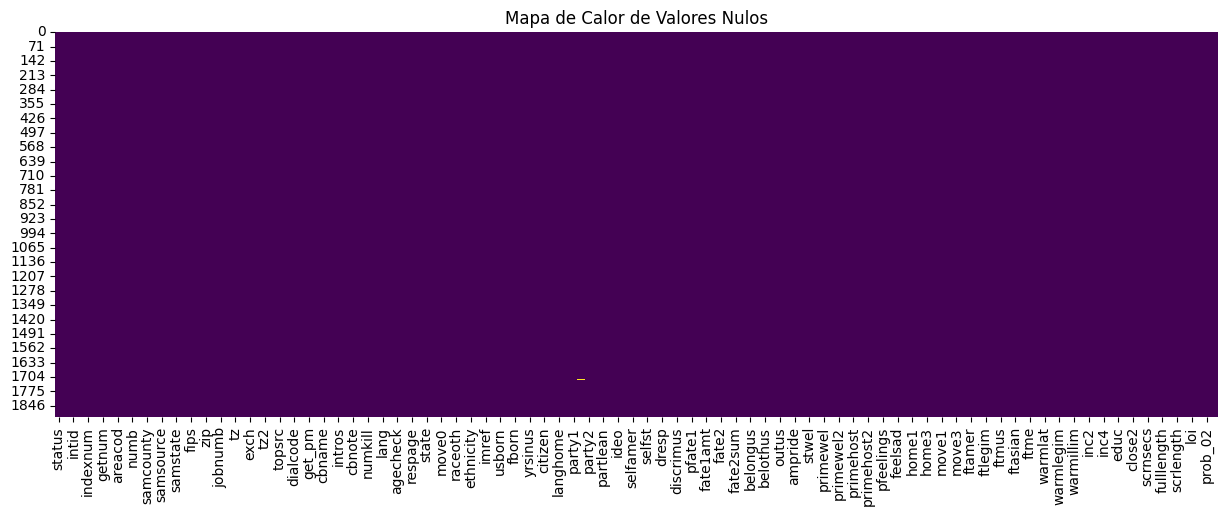


Resumen de Valores Nulos por Columna:
           Número de Nulos  Porcentaje
party1oth                1    0.052549


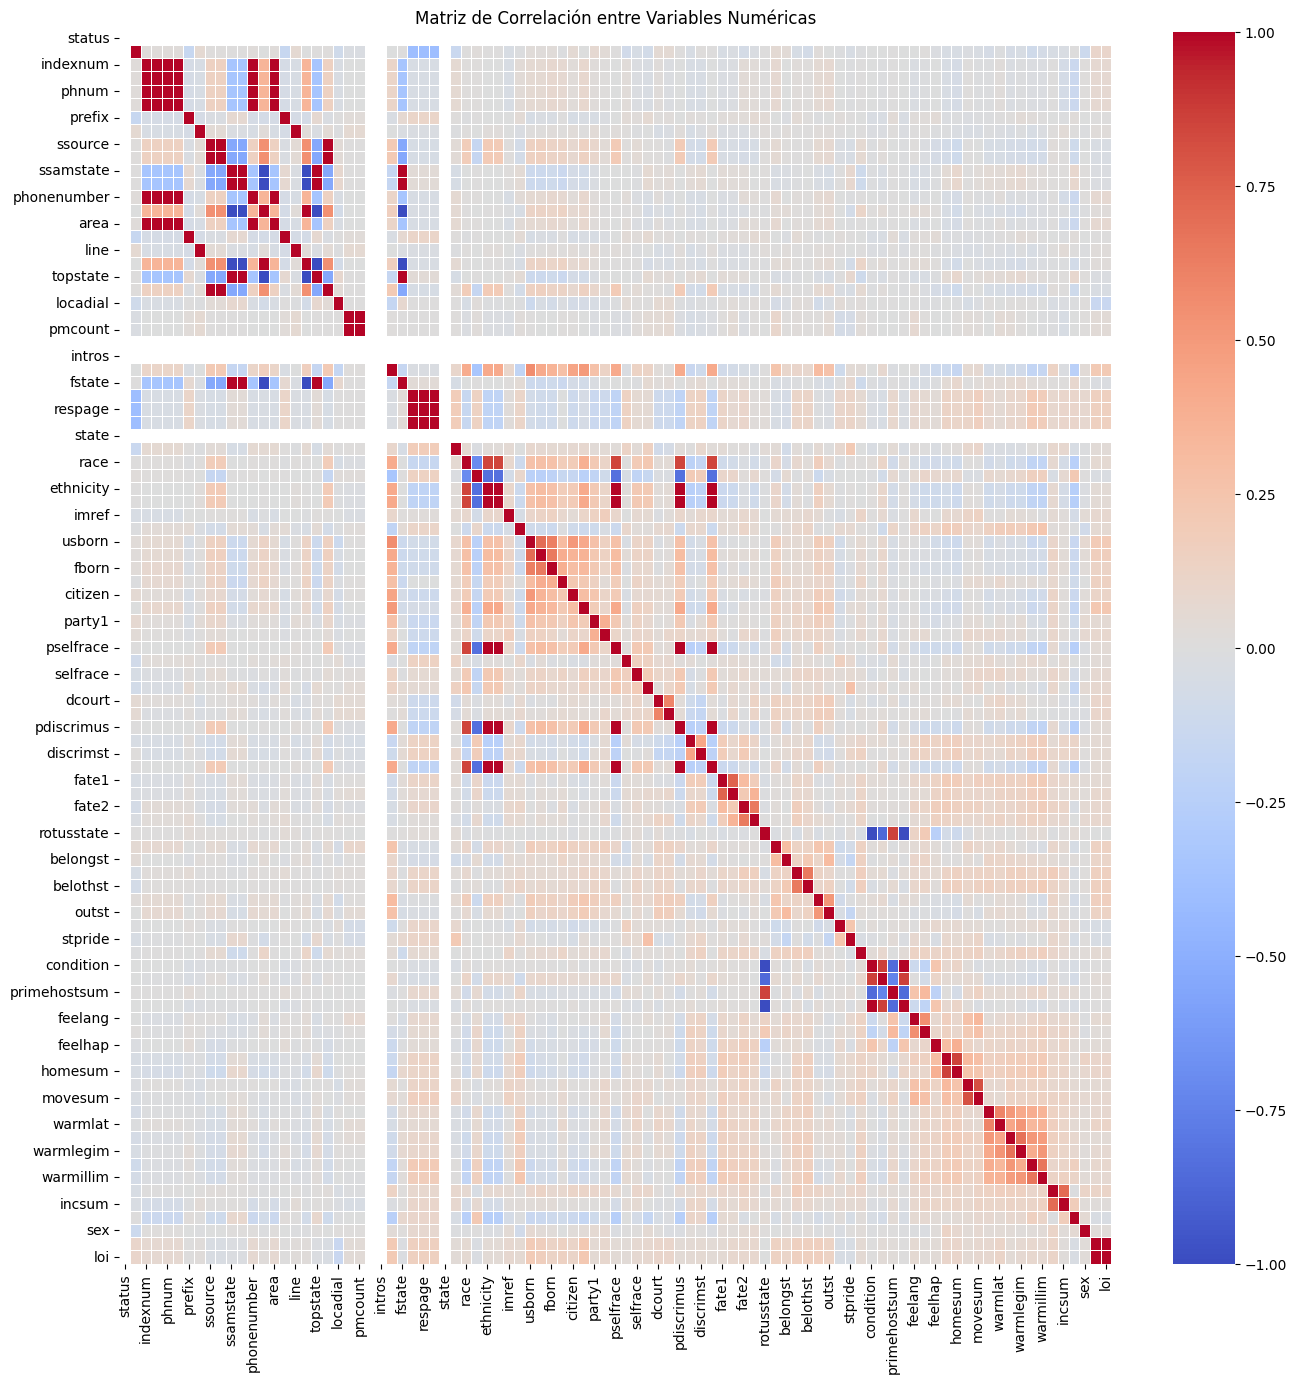

In [23]:
# Seleccionar solo las columnas numéricas
numeric_columns = df_experiment.select_dtypes(include=[np.number])

# Análisis de valores nulos
plt.figure(figsize=(15, 5))
sns.heatmap(df_experiment.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Nulos')
plt.show()

# Ver proporción de valores nulos por columna
null_counts = df_experiment.isnull().sum()
null_percent = (null_counts / len(df_experiment)) * 100
null_summary = pd.DataFrame({'Número de Nulos': null_counts, 'Porcentaje': null_percent})
print("\nResumen de Valores Nulos por Columna:")
print(null_summary[null_summary['Número de Nulos'] > 0])

# Análisis de correlación entre variables numéricas
plt.figure(figsize=(16, 16))
sns.heatmap(numeric_columns.corr(), annot=False, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

## 2. Coeficientes de Similitud para Clustering

### 2.1 Introducción
La selección del coeficiente de similitud adecuado es crucial para obtener resultados de clustering precisos y significativos. Existen varios métodos para medir la similitud o distancia entre observaciones, cada uno con sus propias características:

1. **Distancia Euclidiana**: Mide la distancia directa entre dos puntos en un espacio n-dimensional. Es sensible a la escala de las variables y a la presencia de valores atípicos.
2. **Distancia de Manhattan**: Suma las diferencias absolutas entre coordenadas. Es menos sensible a los valores atípicos y puede manejar mejor las variables con distribuciones no normales.
3. **Coeficiente de Coseno**: Mide la similitud en la dirección de los vectores, ignorando la magnitud. Es útil cuando las diferencias en escala entre las variables no son relevantes.
4. **Coeficiente de Jaccard**: Mide la similitud entre conjuntos binarios. Se usa en datos categóricos o de presencia/ausencia.

### 2.2 Implementación y Evaluación Automática

Para determinar cuál de estos coeficientes es el más adecuado para nuestro conjunto de datos, hemos implementado un procedimiento automatizado que realiza los siguientes pasos:

1. **Cálculo de Matrices de Similitud**: Se calculan matrices de similitud o distancia para cada método, ajustando el tipo de datos según sea necesario.
2. **Aplicación de Clustering Jerárquico**: Se genera un modelo de clustering jerárquico con cada matriz, utilizando el método de enlace promedio.
3. **Evaluación de los Resultados**: Se utilizan tres métricas de validación interna para evaluar la calidad de los clusters generados:
   - **Índice de Silueta**: Mide cuán similares son los objetos dentro del mismo cluster en comparación con objetos de otros clusters. Valores más altos indican mejor cohesión dentro del cluster.
   - **Coeficiente de Calinski-Harabasz**: Evalúa la dispersión entre clusters. Un valor más alto indica una mejor separación entre los clusters.
   - **Índice de Davies-Bouldin**: Mide la relación entre la dispersión dentro de los clusters y la distancia entre clusters. Un valor más bajo es mejor, ya que indica clusters más compactos y bien separados.

### 2.3 Resultados

Después de aplicar los métodos de similitud y realizar el clustering, obtuvimos los siguientes resultados:

| Método     | Silhouette Score | Calinski-Harabasz Score | Davies-Bouldin Score | Mean Score |
|------------|------------------|------------------------|----------------------|------------|
| Euclidean  | 1.000            | 0.267                  | 1.000                | 0.756      |
| Manhattan  | 0.782            | 0.129                  | 0.639                | 0.517      |
| Cosine     | 0.124            | 1.000                  | 0.311                | 0.478      |

- **Error al evaluar Jaccard**: El método de Jaccard no pudo ser evaluado correctamente porque el clustering jerárquico generado resultó en un solo cluster, lo cual es inválido para el cálculo de las métricas. Esto puede suceder cuando los datos binarios no presentan suficiente variabilidad para diferenciar entre observaciones.

### 2.4 Conclusión

El mejor método seleccionado para este conjunto de datos es el **Método Euclidiano**. Este método obtuvo los valores más altos en el Índice de Silueta y el Índice de Davies-Bouldin, indicando que los clusters generados son coherentes y están bien separados. Esto sugiere que la distancia directa entre puntos es la mejor métrica para representar la similitud entre las observaciones en este conjunto de datos.

Estos resultados nos proporcionan una base sólida para aplicar técnicas de clustering jerárquico con el método Euclidiano, garantizando una mejor agrupación y análisis de nuestros datos.


In [26]:
# Función para calcular y evaluar cada coeficiente de similitud
def evaluate_clustering_methods(data):
    # Normalizar datos
    scaler = StandardScaler()
    data_normalized = scaler.fit_transform(data)
    
    # Diccionario para almacenar resultados
    results = {}
    
    # Lista de métodos de similitud a evaluar
    methods = {
        'Euclidean': 'euclidean',
        'Manhattan': 'cityblock',
        'Cosine': 'cosine',
        'Jaccard': 'jaccard'
    }
    
    # Evaluar cada método
    for name, method in methods.items():
        try:
            # Calcular matriz de distancias o similitudes
            if method == 'jaccard':  # Para Jaccard, utilizamos datos binarios
                data_binary = data.notnull().astype(int)
                dist_matrix = pdist(data_binary, metric=method)
            else:
                dist_matrix = pdist(data_normalized, metric=method)
            
            # Convertir a matriz cuadrada
            dist_square = squareform(dist_matrix)
            
            # Aplicar clustering jerárquico
            linkage_matrix = linkage(dist_matrix, method='average')  # Enlace promedio
            
            # Asignar clusters
            labels = fcluster(linkage_matrix, t=3, criterion='maxclust')
            
            # Evaluar con métricas
            silhouette = silhouette_score(data_normalized, labels)
            calinski_harabasz = calinski_harabasz_score(data_normalized, labels)
            davies_bouldin = davies_bouldin_score(data_normalized, labels)
            
            # Guardar resultados
            results[name] = {
                'Silhouette Score': silhouette,
                'Calinski-Harabasz Score': calinski_harabasz,
                'Davies-Bouldin Score': davies_bouldin
            }
        except Exception as e:
            print(f"Error evaluando {name}: {e}")
            continue
    
    # Crear DataFrame con resultados
    results_df = pd.DataFrame(results).T
    
    # Normalizar para seleccionar mejor método
    # El mejor valor de Silhouette y Calinski es el más alto, el de Davies-Bouldin es el más bajo
    results_df['Silhouette Score'] = results_df['Silhouette Score'] / results_df['Silhouette Score'].max()
    results_df['Calinski-Harabasz Score'] = results_df['Calinski-Harabasz Score'] / results_df['Calinski-Harabasz Score'].max()
    results_df['Davies-Bouldin Score'] = results_df['Davies-Bouldin Score'].min() / results_df['Davies-Bouldin Score']
    
    # Promediar puntajes para seleccionar el mejor método
    results_df['Mean Score'] = results_df.mean(axis=1)
    
    # Mostrar resultados ordenados
    best_method = results_df['Mean Score'].idxmax()
    print(f"El mejor método es: {best_method}")
    
    return results_df, best_method

# Aplicar la función a datos numéricos
numeric_data = df_experiment.select_dtypes(include=[np.number]).dropna()
resultados, mejor_metodo = evaluate_clustering_methods(numeric_data)

# Visualizar resultados
print("Resultados de Evaluación de Métodos de Clustering:")
print(resultados)
print(f"El mejor método es: {mejor_metodo}")

Error evaluando Jaccard: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
El mejor método es: Euclidean
Resultados de Evaluación de Métodos de Clustering:
           Silhouette Score  Calinski-Harabasz Score  Davies-Bouldin Score   
Euclidean          1.000000                 0.266670              1.000000  \
Manhattan          0.781644                 0.129459              0.638813   
Cosine             0.124042                 1.000000              0.310575   

           Mean Score  
Euclidean    0.755557  
Manhattan    0.516639  
Cosine       0.478206  
El mejor método es: Euclidean


## 3. Métodos de Clustering Jerárquico

### 3.1 Introducción

El clustering jerárquico es una técnica de agrupación que busca crear una jerarquía de clusters, donde cada nivel de la jerarquía representa una posible partición de los datos en grupos. Se representa mediante un **dendrograma**, que es un diagrama en forma de árbol que muestra las relaciones entre los diferentes clusters.

Existen dos enfoques principales para construir clusters jerárquicos:

- **Clustering Aglomerativo**: Comienza con cada observación como un cluster individual y fusiona los clusters más cercanos en cada paso, hasta que todos los datos se agrupan en un solo cluster.
- **Clustering Divisivo**: Comienza con todos los datos en un solo cluster y los divide iterativamente hasta que cada observación está en su propio cluster.

### 3.2 Métodos de Enlace en Clustering Jerárquico

Los métodos de enlace determinan cómo se calcula la distancia entre clusters en cada paso del algoritmo. A continuación, se describen tres métodos comunes:

1. **Enlace Simple (Single Linkage)**:
   - También conocido como método de "mínima distancia".
   - La distancia entre dos clusters se define como la distancia mínima entre cualquier par de puntos en los dos clusters.
   - **Ventaja**: Puede identificar clusters con formas arbitrarias.
   - **Desventaja**: Es susceptible a cadenas, donde puntos lejanos se agrupan debido a puntos intermedios.

2. **Enlace Completo (Complete Linkage)**:
   - Conocido también como método de "máxima distancia".
   - La distancia entre dos clusters se define como la distancia máxima entre cualquier par de puntos en los dos clusters.
   - **Ventaja**: Produce clusters más compactos y homogéneos.
   - **Desventaja**: Tiende a romper clusters grandes en pequeños, incluso si están cerca.

3. **Enlace Promedio (Average Linkage)**:
   - La distancia entre dos clusters se define como el promedio de todas las distancias entre los pares de puntos en los dos clusters.
   - **Ventaja**: Es un equilibrio entre los métodos de enlace simple y completo, reduciendo las desventajas de ambos.
   - **Desventaja**: Puede ser computacionalmente intensivo para grandes conjuntos de datos.

### 3.3 Aplicación de los Métodos de Clustering Jerárquico

Utilizando el coeficiente de similitud Euclidiano, aplicamos cada uno de los métodos de clustering jerárquico y visualizamos los dendrogramas correspondientes.



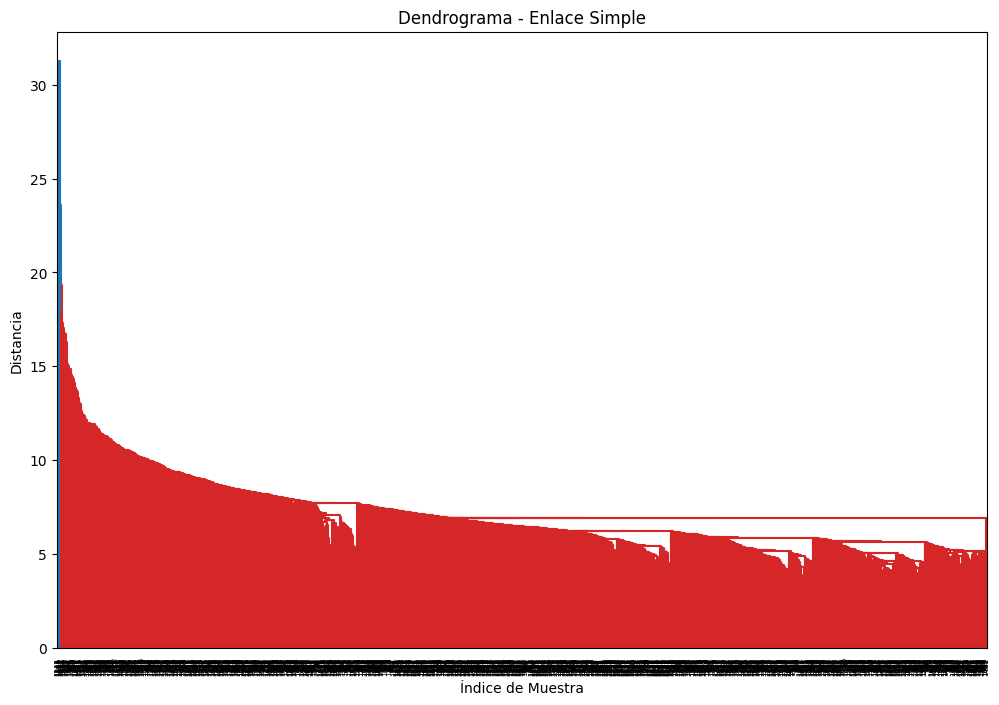

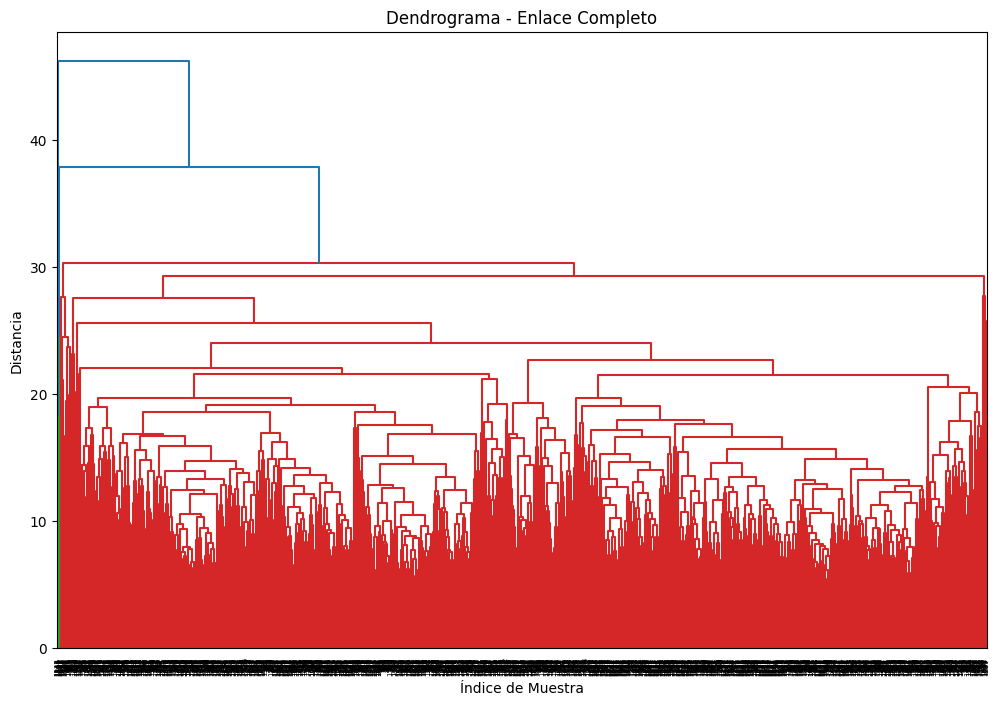

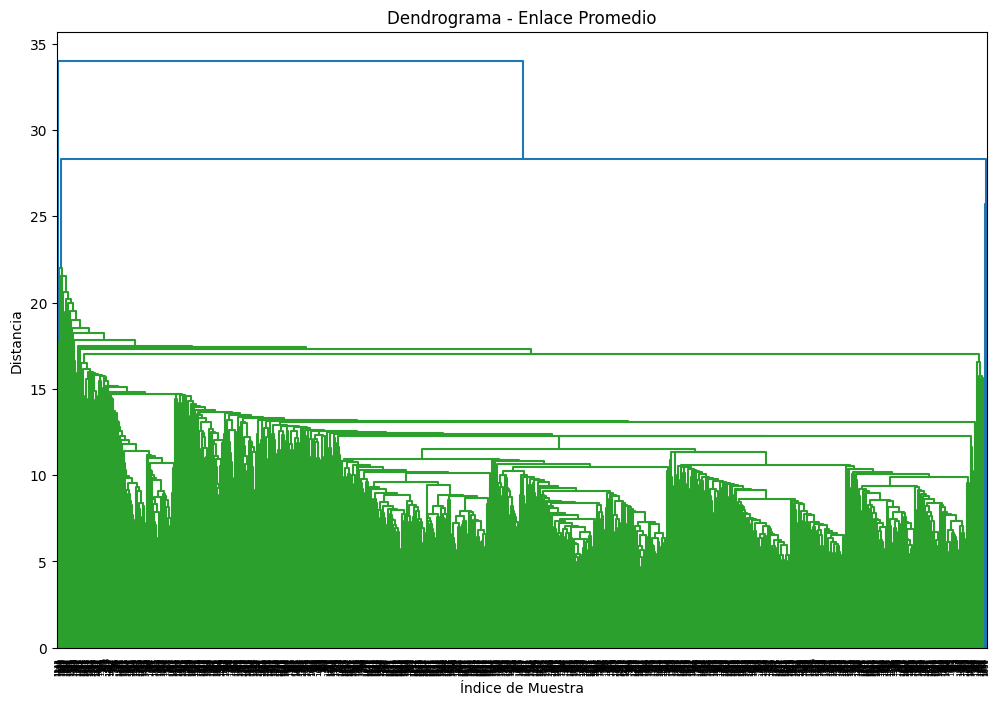

In [28]:
# Normalización de los datos numéricos seleccionados
selected_data = df_experiment.select_dtypes(include=[np.number]).dropna()
scaler = StandardScaler()
data_normalized = scaler.fit_transform(selected_data)

# Aplicar clustering jerárquico con diferentes métodos de enlace usando distancia Euclidiana
methods = ['single', 'complete', 'average']
linkage_matrices = {}

for method in methods:
    # Generar el clustering jerárquico para cada método de enlace
    linkage_matrix = linkage(data_normalized, method=method)
    linkage_matrices[method] = linkage_matrix

# Visualización de dendrogramas en gráficos separados

# Dendrograma para Enlace Simple (Single Linkage)
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrices['single'])
plt.title('Dendrograma - Enlace Simple')
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia')
plt.show()

# Dendrograma para Enlace Completo (Complete Linkage)
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrices['complete'])
plt.title('Dendrograma - Enlace Completo')
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia')
plt.show()

# Dendrograma para Enlace Promedio (Average Linkage)
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrices['average'])
plt.title('Dendrograma - Enlace Promedio')
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia')
plt.show()

### 3.2 Interpretación de los Dendrogramas

A continuación, se analizan los dendrogramas resultantes de cada método de enlace.

#### 3.2.1 Dendrograma - Enlace Simple (Single Linkage)

- **Interpretación**:
  - La mayoría de los datos se agrupan a alturas muy bajas, lo que indica que los puntos están muy próximos entre sí.
  - La estructura en forma de cadena muestra que el método de enlace simple puede generar clusters alargados, propensos al efecto de encadenamiento.
  - A la izquierda del dendrograma, hay un grupo más distante que se une a una distancia considerablemente mayor, indicando la presencia de puntos aislados o outliers.

#### 3.2.2 Dendrograma - Enlace Completo (Complete Linkage)

- **Interpretación**:
  - Se observan clusters más equilibrados y compactos en comparación con el enlace simple, indicando una agrupación uniforme de los datos.
  - Hay una clara separación de los clusters a diferentes alturas, lo que indica subgrupos bien definidos.
  - Los clusters se unen a distancias mayores (entre 20 y 30), sugiriendo que los puntos dentro de cada cluster están muy cercanos antes de fusionarse con otros.

#### 3.2.3 Dendrograma - Enlace Promedio (Average Linkage)

- **Interpretación**:
  - La estructura del dendrograma es más balanceada, con clusters bien formados y separados a distancias progresivas.
  - La altura de las uniones es más uniforme, lo que sugiere que este método es menos sensible a valores extremos.
  - Se puede identificar un corte claro en el dendrograma para formar un número óptimo de clusters (por ejemplo, a la altura 15), donde se observa una separación considerable entre los grupos principales.

### 3.3 Comparación de Métodos y Recomendación

Cada método tiene características específicas que lo hacen más o menos adecuado según el tipo de datos:

- **Enlace Simple**: Ideal para detectar patrones de encadenamiento y outliers, pero puede formar clusters irregulares.
- **Enlace Completo**: Proporciona clusters más compactos y bien definidos. Es útil cuando se necesita una separación clara de grupos.
- **Enlace Promedio**: Ofrece un balance entre los otros dos métodos, formando clusters homogéneos y balanceados.

### 3.4 Conclusión

Dado el análisis visual y la estructura de los clusters observados:

- **Recomendación**: El método de **Enlace Promedio** es el más adecuado para este conjunto de datos, ya que proporciona un equilibrio adecuado entre cohesión interna y separación de clusters.
- **Número de Clusters**: Se recomienda cortar el dendrograma del método de enlace promedio a una altura alrededor de 15, obteniendo así de 3 a 4 clusters principales.

Esta interpretación proporciona una visión clara de la estructura de los datos y sugiere el uso del método de enlace promedio para obtener una partición inicial de los datos.